In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [4]:
pd.__version__


'1.4.2'

In [5]:
!pip install pyarrow

In [6]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [8]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.0,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.0,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.0,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.0,0.5,4.43,0.0,1.0,26.58,NaN,NaN
3066765,2,2023-01-31 23:07:32,2023-01-31 23:21:56,NaN,2.85,NaN,None,262,143,0,15.97,0.0,0.5,2.00,0.0,1.0,21.97,NaN,NaN


In [9]:
df.shape

(3066766, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [11]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
std,4.438480e-01,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00


In [12]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [13]:
df['duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df['duration_minutes'].round(2)

0           8.43
1           6.32
2          12.75
3           9.62
4          10.83
           ...  
3066761    13.98
3066762    19.45
3066763    24.52
3066764    13.00
3066765    14.40
Name: duration_minutes, Length: 3066766, dtype: float64

In [14]:
df['duration_minutes'].describe(percentiles = [0.95, 0.98, 0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration_minutes, dtype: float64

In [15]:
((df['duration_minutes'] >= 1) & (df['duration_minutes'] <= 60)).mean()

0.9812202822125979

In [16]:
df.nunique()

VendorID                       2
tpep_pickup_datetime     1610975
tpep_dropoff_datetime    1611319
passenger_count               10
trip_distance               4387
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 257
DOLocationID                 261
payment_type                   5
fare_amount                 6873
extra                         68
mta_tax                       10
tip_amount                  4036
tolls_amount                 776
improvement_surcharge          5
total_amount               15871
congestion_surcharge           3
airport_fee                    3
duration_minutes            8579
dtype: int64

In [17]:
df.isnull().sum().sum()

358715

In [18]:
df_duration_min = df['duration_minutes']

In [19]:
df_duration_min.duplicated().sum()

3058187

In [20]:
##. plt.figure(figsize=(12, 6))
#sns.histplot(df['duration_minutes'], bins=50, kde=True)
#plt.title('Duration Distribution Before Outlier Removal')
#plt.xlabel('Duration (minutes)')
#plt.ylabel('Frequency')
#plt.axvline(x=1, color='r', linestyle='--', label='1 min threshold')
#plt.axvline(x=60, color='r', linestyle='--', label='60 min threshold')
#plt.legend()
#plt.show()

In [21]:
df_subset_filter= df_duration_min[(df_duration_min >=1 ) & (df_duration_min <=60)].copy()

len(df_subset_filter)

3009173

In [22]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [23]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

print(f"Dimensionality (number of columns): {X_train.shape[1]}")

Dimensionality (number of columns): 519


In [26]:
target = 'duration_minutes'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred)

1763.710176100855

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


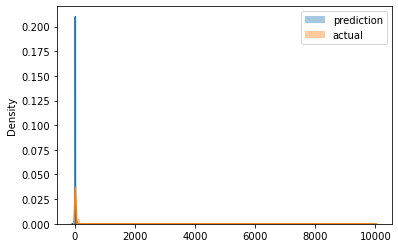

In [27]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [30]:
mean_squared_error(y_train, y_pred, squared=False)

41.996549573754926